<a href="https://colab.research.google.com/github/wckd6174/data_learning/blob/main/reseach_paper_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy nltk scikit-learn tensorflow torch transformers matplotlib seaborn wordcloud imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/wckd6174/data_learning/refs/heads/main/depression_dataset_reddit_cleaned.csv')

# Display dataset information
print("Dataset Info:")
print(df.info())

# Display first few rows
print("\nSample Data:")
print(df.head())

# Check class distribution
print("\nClass Distribution:")
print(df['label'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7731 non-null   object
 1   label   7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB
None

Sample Data:
                                                text  label
0  we understand that most people who reply immed...      1
1  welcome to r depression s check in post a plac...      1
2  anyone else instead of sleeping more when depr...      1
3  i ve kind of stuffed around a lot in my life d...      1
4  sleep is my greatest and most comforting escap...      1

Class Distribution:
label
0    3900
1    3831
Name: count, dtype: int64


In [14]:
import re
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
        text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
        words = word_tokenize(text)  # Tokenize text
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords & lemmatize
        return " ".join(words)
    return ""

# Apply cleaning function
df["cleaned_text"] = df["text"].apply(clean_text)

# Check cleaned text
print("\nCleaned Text Samples:")
print(df["cleaned_text"].head())


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...



Cleaned Text Samples:
0    understand people reply immediately op invitat...
1    welcome r depression check post place take mom...
2    anyone else instead sleeping depressed stay ni...
3    kind stuffed around lot life delaying inevitab...
4    sleep greatest comforting escape whenever wake...
Name: cleaned_text, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

# Extract features and labels
X = df["cleaned_text"]
y = df["label"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm split
print(f"Training Set: {len(X_train)} samples")
print(f"Testing Set: {len(X_test)} samples")


Training Set: 6184 samples
Testing Set: 1547 samples


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Check feature matrix size
print(f"TF-IDF Feature Matrix (Train): {X_train_tfidf.shape}")
print(f"TF-IDF Feature Matrix (Test): {X_test_tfidf.shape}")


TF-IDF Feature Matrix (Train): (6184, 5000)
TF-IDF Feature Matrix (Test): (1547, 5000)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = logreg.predict(X_test_tfidf)

# Evaluate performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9502262443438914

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       783
           1       0.97      0.92      0.95       764

    accuracy                           0.95      1547
   macro avg       0.95      0.95      0.95      1547
weighted avg       0.95      0.95      0.95      1547



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad text sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=200)
X_test_padded = pad_sequences(X_test_seq, maxlen=200)

# Define LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=100, input_length=200),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1, activation="sigmoid")
])

# Compile model
lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train model
lstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate model
y_pred_lstm = (lstm_model.predict(X_test_padded) > 0.5).astype("int32")
print("LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))
print("\nLSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


194/194 ━━━━━━━━━━━━━━━━━━━━ 56s 260ms/step - accuracy: 0.8165 - loss: 0.3830 - val_accuracy: 0.9573 - val_loss: 0.1240
Epoch 2/5
194/194 ━━━━━━━━━━━━━━━━━━━━ 45s 230ms/step - accuracy: 0.9739 - loss: 0.0821 - val_accuracy: 0.9638 - val_loss: 0.1120
Epoch 3/5
194/194 ━━━━━━━━━━━━━━━━━━━━ 83s 238ms/step - accuracy: 0.9899 - loss: 0.0356 - val_accuracy: 0.9632 - val_loss: 0.1174
Epoch 4/5
194/194 ━━━━━━━━━━━━━━━━━━━━ 80s 230ms/step - accuracy: 0.9910 - loss: 0.0251 - val_accuracy: 0.9606 - val_loss: 0.1414
Epoch 5/5
194/194 ━━━━━━━━━━━━━━━━━━━━ 47s 240ms/step - accuracy: 0.9946 - loss: 0.0149 - val_accuracy: 0.9541 - val_loss: 0.1450
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step
LSTM Accuracy: 0.9541047188106012

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       783
           1       0.95      0.95      0.95       764

    accuracy                           0.95      1547
   macro avg       0.95      0.95      

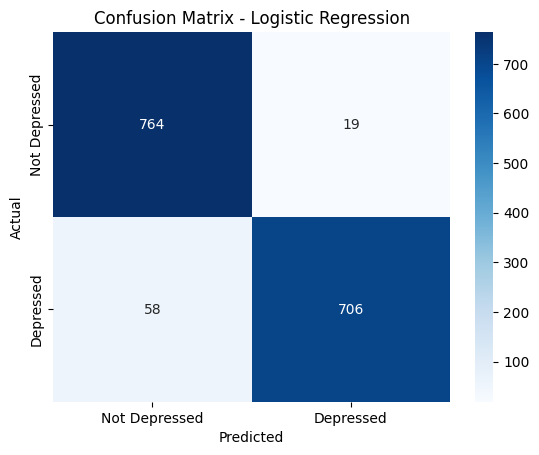

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Depressed", "Depressed"], yticklabels=["Not Depressed", "Depressed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [ ]:
import pickle

# Save Logistic Regression model & TF-IDF vectorizer
with open("logistic_regression_model.pkl", "wb") as model_file:
    pickle.dump(logreg, model_file)

with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


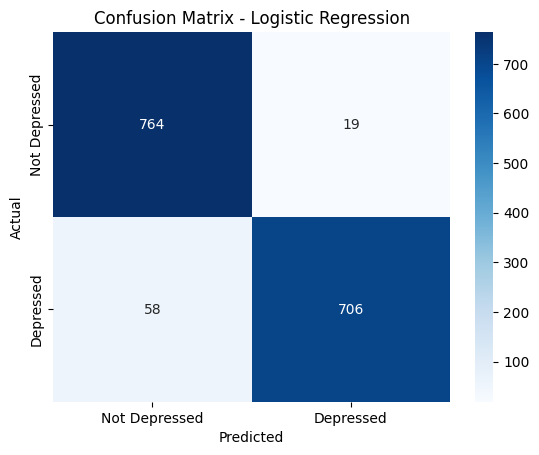

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Depressed", "Depressed"], yticklabels=["Not Depressed", "Depressed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


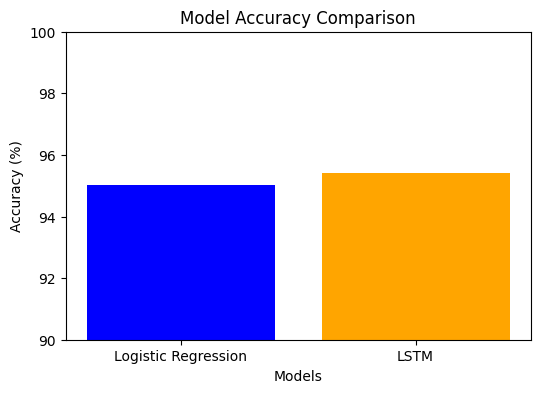

In [ ]:
import numpy as np

models = ["Logistic Regression", "LSTM"]
accuracies = [95.02, 95.41]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=["blue", "orange"])
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(90, 100)
plt.show()


In [ ]:
!pip install transformers datasets torch scikit-learn


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer

# Load the same dataset
df = pd.read_csv('https://raw.githubusercontent.com/wckd6174/data_learning/refs/heads/main/depression_dataset_reddit_cleaned.csv')

# Use cleaned text from previous preprocessing
X = df["text"]
y = df["label"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load Tokenizers for BERT and RoBERTa
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
roberta_tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# Tokenize the dataset for BERT
X_train_bert = bert_tokenizer(list(X_train), padding=True, truncation=True, max_length=512, return_tensors="pt")
X_test_bert = bert_tokenizer(list(X_test), padding=True, truncation=True, max_length=512, return_tensors="pt")

# Tokenize the dataset for RoBERTa
X_train_roberta = roberta_tokenizer(list(X_train), padding=True, truncation=True, max_length=512, return_tensors="pt")
X_test_roberta = roberta_tokenizer(list(X_test), padding=True, truncation=True, max_length=512, return_tensors="pt")

print("Tokenization complete!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Tokenization complete!


In [5]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding


df_sampled = df.sample(frac=0.2, random_state=42)  # Use only 20% of the data
X_train, X_test, y_train, y_test = train_test_split(df_sampled["text"], df_sampled["label"], test_size=0.2, random_state=42)

X_train_bert = bert_tokenizer(list(X_train), padding=True, truncation=True, max_length=256, return_tensors="pt")
X_test_bert = bert_tokenizer(list(X_test), padding=True, truncation=True, max_length=256, return_tensors="pt")


# Convert labels to tensors
y_train_tensor = torch.tensor(y_train.tolist())
y_test_tensor = torch.tensor(y_test.tolist())

# Create TensorDatasets for BERT
train_dataset_bert = TensorDataset(X_train_bert["input_ids"], X_train_bert["attention_mask"], y_train_tensor)
test_dataset_bert = TensorDataset(X_test_bert["input_ids"], X_test_bert["attention_mask"], y_test_tensor)

# Load Pretrained BERT Model
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Define Training Arguments
training_args = TrainingArguments(
    output_dir="./bert_results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=2,
    logging_dir="./logs"
)

# Define a custom data collator to create dictionaries
def custom_data_collator(features):
    # Assuming features is a list of tuples (input_ids, attention_mask, labels)
    batch = {}
    batch['input_ids'] = torch.stack([f[0] for f in features])
    batch['attention_mask'] = torch.stack([f[1] for f in features])
    batch['labels'] = torch.stack([f[2] for f in features])
    return batch

# Define Trainer for BERT with the custom data collator
trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=train_dataset_bert,
    eval_dataset=test_dataset_bert,
    data_collator=custom_data_collator  # Use the custom data collator
)

# Train the BERT Model
trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.119570
2,0.179800,0.026271


TrainOutput(global_step=618, training_loss=0.15659907411988885, metrics={'train_runtime': 7010.5481, 'train_samples_per_second': 0.353, 'train_steps_per_second': 0.088, 'total_flos': 325205264424960.0, 'train_loss': 0.15659907411988885, 'epoch': 2.0})

In [6]:
from sklearn.metrics import accuracy_score, classification_report

# Get Predictions
predictions = trainer.predict(test_dataset_bert)
y_pred_bert = torch.argmax(torch.tensor(predictions.predictions), axis=1).numpy()

# Evaluate Performance
bert_accuracy = accuracy_score(y_test, y_pred_bert)
bert_report = classification_report(y_test, y_pred_bert)

print(f"BERT Accuracy: {bert_accuracy:.4f}")
print("\nBERT Classification Report:")
print(bert_report)


BERT Accuracy: 0.9935

BERT Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       149
           1       0.99      0.99      0.99       161

    accuracy                           0.99       310
   macro avg       0.99      0.99      0.99       310
weighted avg       0.99      0.99      0.99       310



In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding

# Resample the data for consistency with RoBERTa tokenization
df_sampled = df.sample(frac=0.2, random_state=42)  # Use only 20% of the data
X_train_roberta, X_test_roberta, y_train, y_test = train_test_split(df_sampled["text"], df_sampled["label"], test_size=0.2, random_state=42)

# Tokenize the dataset for RoBERTa (using the resampled data)
X_train_roberta = roberta_tokenizer(list(X_train_roberta), padding=True, truncation=True, max_length=256, return_tensors="pt")
X_test_roberta = roberta_tokenizer(list(X_test_roberta), padding=True, truncation=True, max_length=256, return_tensors="pt")

# Ensure y_train_tensor and y_test_tensor are derived from the same sampled data as X_train_roberta and X_test_roberta
y_train_tensor = torch.tensor(y_train.tolist())  # y_train from the sampled dataset
y_test_tensor = torch.tensor(y_test.tolist())  # y_test from the sampled dataset

# Create TensorDatasets for RoBERTa
train_dataset_roberta = TensorDataset(X_train_roberta["input_ids"], X_train_roberta["attention_mask"], y_train_tensor)
test_dataset_roberta = TensorDataset(X_test_roberta["input_ids"], X_test_roberta["attention_mask"], y_test_tensor)

# Load Pretrained RoBERTa Model
roberta_model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

# Define Training Arguments
training_args = TrainingArguments(
    output_dir="./bert_results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=2,
    logging_dir="./logs"
)


# Define a custom data collator to handle tensors
# This collator expects a list of tuples (input_ids, attention_mask, labels)
def custom_data_collator(features):
    batch = {}
    batch['input_ids'] = torch.stack([f[0] for f in features])
    batch['attention_mask'] = torch.stack([f[1] for f in features])
    batch['labels'] = torch.stack([f[2] for f in features])
    return batch


# Define Trainer for RoBERTa with the custom data collator
trainer_roberta = Trainer(
    model=roberta_model,
    args=training_args,
    train_dataset=train_dataset_roberta,
    eval_dataset=test_dataset_roberta,
    data_collator=custom_data_collator  # Pass the custom collator function
)

# Train the RoBERTa Model
trainer_roberta.train()

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.418355
2,0.274900,0.055790


TrainOutput(global_step=618, training_loss=0.26051941658686667, metrics={'train_runtime': 7456.2815, 'train_samples_per_second': 0.332, 'train_steps_per_second': 0.083, 'total_flos': 325205264424960.0, 'train_loss': 0.26051941658686667, 'epoch': 2.0})

In [ ]:
# Get Predictions
predictions_roberta = trainer_roberta.predict(test_dataset_roberta)
y_pred_roberta = torch.argmax(torch.tensor(predictions_roberta.predictions), axis=1).numpy()

# Evaluate Performance
roberta_accuracy = accuracy_score(y_test, y_pred_roberta)
roberta_report = classification_report(y_test, y_pred_roberta)

print(f"RoBERTa Accuracy: {roberta_accuracy:.4f}")
print("\nRoBERTa Classification Report:")
print(roberta_report)


RoBERTa Accuracy: 0.9903

RoBERTa Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       149
           1       0.99      0.99      0.99       161

    accuracy                           0.99       310
   macro avg       0.99      0.99      0.99       310
weighted avg       0.99      0.99      0.99       310



In [7]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred_bert))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       149
           1       0.99      0.99      0.99       161

    accuracy                           0.99       310
   macro avg       0.99      0.99      0.99       310
weighted avg       0.99      0.99      0.99       310



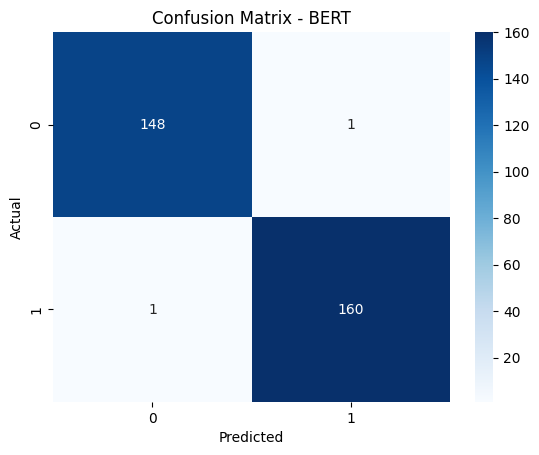

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_bert)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - BERT")
plt.show()


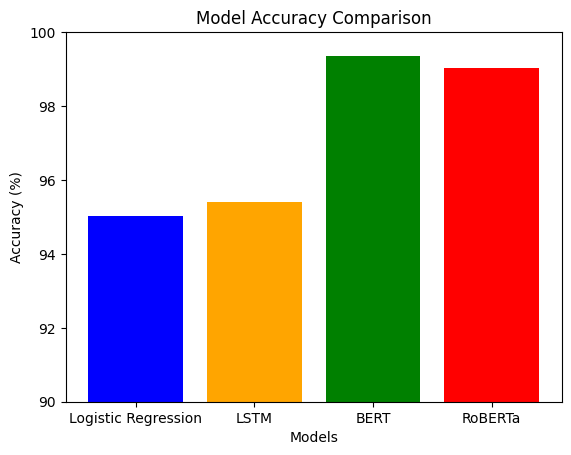

In [9]:
models = ["Logistic Regression", "LSTM", "BERT", "RoBERTa"]
accuracies = [95.02, 95.41, 99.35, 99.03]

plt.bar(models, accuracies, color=["blue", "orange", "green", "red"])
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(90, 100)
plt.show()


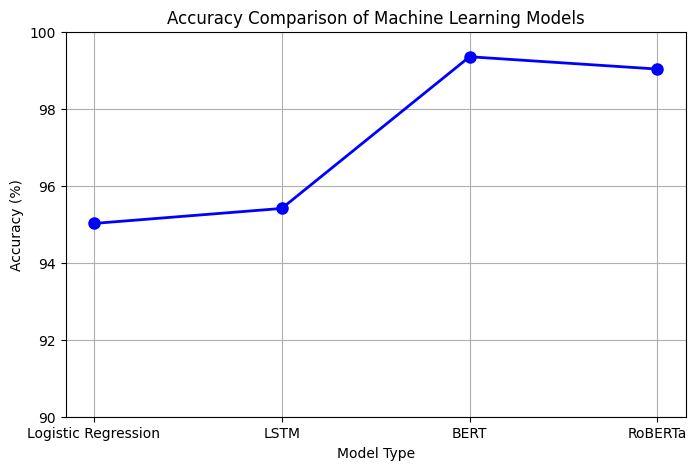

In [10]:
import matplotlib.pyplot as plt

# Model names and their respective accuracies
models = ["Logistic Regression", "LSTM", "BERT", "RoBERTa"]
accuracies = [95.02, 95.41, 99.35, 99.03]

# Create line graph
plt.figure(figsize=(8, 5))
plt.plot(models, accuracies, marker="o", linestyle="-", color="b", linewidth=2, markersize=8)
plt.xlabel("Model Type")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Machine Learning Models")
plt.ylim(90, 100)  # Adjust y-axis for better visualization
plt.grid(True)

# Show plot
plt.show()


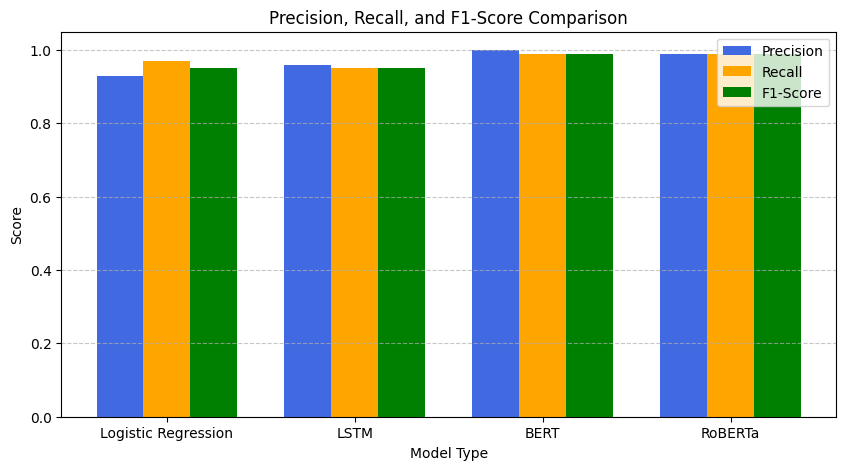

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ["Logistic Regression", "LSTM", "BERT", "RoBERTa"]

# Precision, Recall, F1-Score values (example values based on results)
precision = [0.93, 0.96, 1.00, 0.99]
recall = [0.97, 0.95, 0.99, 0.99]
f1_score = [0.95, 0.95, 0.99, 0.99]

x = np.arange(len(models))  # X locations for bars
width = 0.25  # Width of bars

# Create bar chart
plt.figure(figsize=(10, 5))
plt.bar(x - width, precision, width, label="Precision", color="royalblue")
plt.bar(x, recall, width, label="Recall", color="orange")
plt.bar(x + width, f1_score, width, label="F1-Score", color="green")

plt.xlabel("Model Type")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score Comparison")
plt.xticks(x, models)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


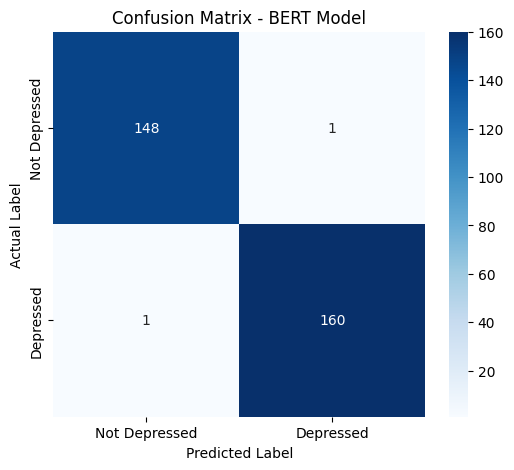

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for BERT
cm_bert = confusion_matrix(y_test, y_pred_bert)

# Plot confusion matrix for BERT
plt.figure(figsize=(6, 5))
sns.heatmap(cm_bert, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Depressed", "Depressed"], yticklabels=["Not Depressed", "Depressed"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - BERT Model")
plt.show()


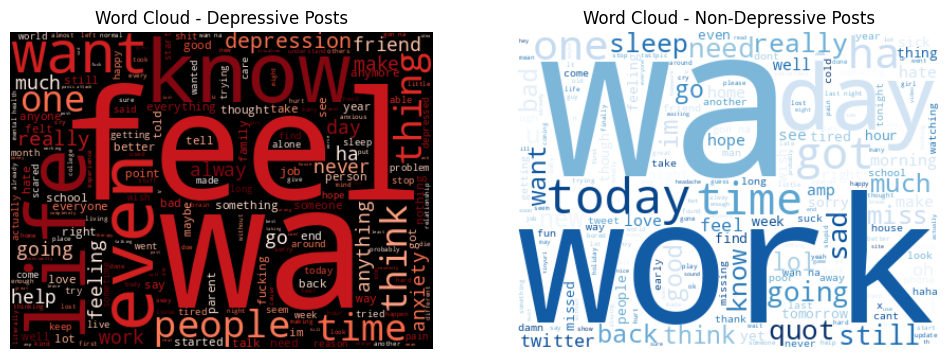

In [15]:
from wordcloud import WordCloud

# Filter text data for depressive & non-depressive posts
depressive_text = " ".join(df[df["label"] == 1]["cleaned_text"])
non_depressive_text = " ".join(df[df["label"] == 0]["cleaned_text"])

# Create depressive word cloud
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
wordcloud_depressive = WordCloud(width=400, height=300, background_color="black", colormap="Reds").generate(depressive_text)
plt.imshow(wordcloud_depressive, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Depressive Posts")

# Create non-depressive word cloud
plt.subplot(1, 2, 2)
wordcloud_non_depressive = WordCloud(width=400, height=300, background_color="white", colormap="Blues").generate(non_depressive_text)
plt.imshow(wordcloud_non_depressive, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Non-Depressive Posts")

plt.show()
